In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import joblib
import streamlit as st

In [2]:
def display_confusion_matrix (y_test, y_pred):
    cm=confusion_matrix(y_test,y_pred)
    ConfusionMatrixDisplay(cm).plot()

In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

X = mnist["data"]
y = mnist["target"].astype(np.uint8)

In [4]:
# Extracting only 14,000 samples out of 70,000
X = X[:14000]
y = y[:14000]

In [5]:
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=2000, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=2000, random_state=42)

In [6]:
# Print shapes of the datasets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (10000, 784)
y_train shape: (10000,)
X_val shape: (2000, 784)
y_val shape: (2000,)
X_test shape: (2000, 784)
y_test shape: (2000,)


In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)  
X_test_scaled = scaler.transform(X_test) 

In [8]:
#Random Forest Classifier

In [10]:
rf_clf = RandomForestClassifier()
hyper_param_grid_randomforest = {
    'n_estimators': [100, 200, 300,400],  
    'max_depth': [None, 10, 20,30]}      
grid_rf = GridSearchCV(RandomForestClassifier(),param_grid=hyper_param_grid_randomforest,refit=True,verbose=2,cv=3)
grid_rf.fit(X_train_scaled,y_train)
# Save the trained model
joblib.dump(grid_rf.best_estimator_, "random_forest_model_final.pkl")
# Load the saved model
loaded_model_rf = joblib.load("random_forest_model_final.pkl")
# Use the loaded model for prediction
y_pred_rf = loaded_model_rf.predict(X_val_scaled)
# Print the best parameters and accuracy
print("Best Parameters:", grid_rf.best_params_)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END ...................max_depth=None, n_estimators=100; total time=   3.6s
[CV] END ...................max_depth=None, n_estimators=100; total time=   3.6s
[CV] END ...................max_depth=None, n_estimators=100; total time=   3.6s
[CV] END ...................max_depth=None, n_estimators=200; total time=   7.2s
[CV] END ...................max_depth=None, n_estimators=200; total time=   7.2s
[CV] END ...................max_depth=None, n_estimators=200; total time=   8.0s
[CV] END ...................max_depth=None, n_estimators=300; total time=  12.1s
[CV] END ...................max_depth=None, n_estimators=300; total time=  11.0s
[CV] END ...................max_depth=None, n_estimators=300; total time=  11.2s
[CV] END ...................max_depth=None, n_estimators=400; total time=  14.9s
[CV] END ...................max_depth=None, n_estimators=400; total time=  15.5s
[CV] END ...................max_depth=None, n_es

In [11]:
test_accuracy_rf=accuracy_score(y_val,y_pred_rf)
print("Test Accuracy:", test_accuracy_rf)

Test Accuracy: 0.9505


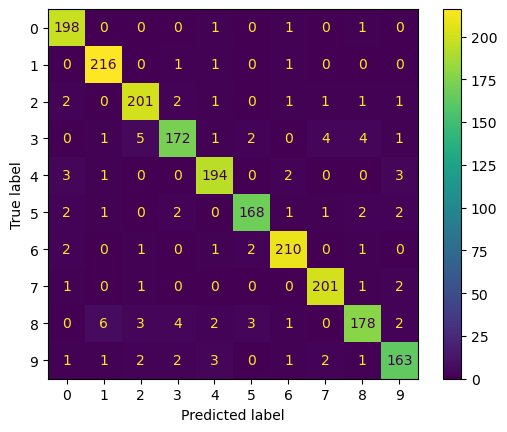

In [14]:
display_confusion_matrix(y_val,y_pred_rf)

Correction on line 11: checking validation accuracy

In [12]:
#Training non-linear svc

In [13]:
svm=SVC()
hyper_param_grid_svc=[{'kernel':['rbf','poly'],'gamma':[0,1,2],'C':[0.5,1,1.5]}]
grid_svc = GridSearchCV(SVC(),param_grid=hyper_param_grid_svc,refit=True,verbose=2,cv=3)
grid_svc.fit(X_train_scaled,y_train)
# Save the trained model
joblib.dump(grid_svc.best_estimator_, "svc_final.pkl")
# Load the saved model
loaded_model_svc = joblib.load("svc_final.pkl")
# Use the loaded model for prediction
y_pred_svc = loaded_model_svc.predict(X_val_scaled)
print("Best Parameters:", grid_svc.best_params_)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] END .........................C=0.5, gamma=0, kernel=rbf; total time=  40.0s
[CV] END .........................C=0.5, gamma=0, kernel=rbf; total time=  39.3s
[CV] END .........................C=0.5, gamma=0, kernel=rbf; total time=  39.8s
[CV] END ........................C=0.5, gamma=0, kernel=poly; total time=  32.1s
[CV] END ........................C=0.5, gamma=0, kernel=poly; total time=  32.3s
[CV] END ........................C=0.5, gamma=0, kernel=poly; total time=  36.0s
[CV] END .........................C=0.5, gamma=1, kernel=rbf; total time=  46.9s
[CV] END .........................C=0.5, gamma=1, kernel=rbf; total time=  47.0s
[CV] END .........................C=0.5, gamma=1, kernel=rbf; total time=  46.2s
[CV] END ........................C=0.5, gamma=1, kernel=poly; total time=  13.4s
[CV] END ........................C=0.5, gamma=1, kernel=poly; total time=  13.8s
[CV] END ........................C=0.5, gamma=1,

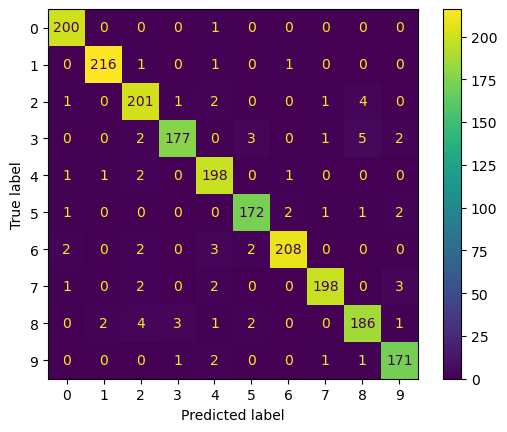

In [15]:
display_confusion_matrix(y_val,y_pred_svc)

In [16]:
val_accuracy_svc = accuracy_score(y_val, y_pred_svc)
print("Test Accuracy:", val_accuracy_svc)

Test Accuracy: 0.9635


In [17]:
#Training KNN

In [18]:
knn=KNeighborsClassifier()
hyper_param_grid_knn={'n_neighbors': [3, 5, 7]}
grid_knn = GridSearchCV(KNeighborsClassifier(),param_grid=hyper_param_grid_knn,refit=True,verbose=2,cv=3)
grid_knn.fit(X_train_scaled,y_train)
# Save the trained model
joblib.dump(grid_knn.best_estimator_, "knn_final.pkl")
# Load the saved model
loaded_model_knn = joblib.load("knn_final.pkl")
# Use the loaded model for prediction
y_pred_knn = loaded_model_knn.predict(X_val_scaled)
print("Best Parameters:", grid_knn.best_params_) 

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] END ......................................n_neighbors=3; total time=   0.7s
[CV] END ......................................n_neighbors=3; total time=   0.3s
[CV] END ......................................n_neighbors=3; total time=   0.4s
[CV] END ......................................n_neighbors=5; total time=   0.3s
[CV] END ......................................n_neighbors=5; total time=   0.3s
[CV] END ......................................n_neighbors=5; total time=   0.3s
[CV] END ......................................n_neighbors=7; total time=   0.3s
[CV] END ......................................n_neighbors=7; total time=   0.3s
[CV] END ......................................n_neighbors=7; total time=   0.3s
Best Parameters: {'n_neighbors': 5}


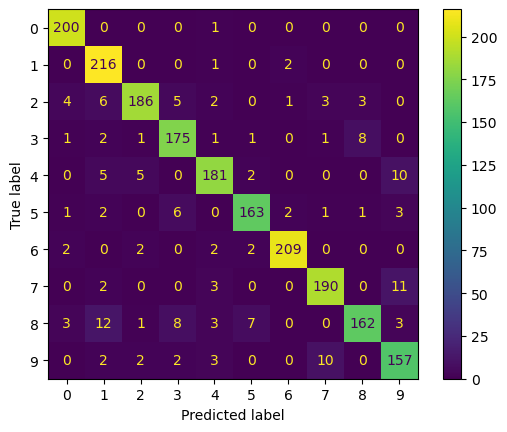

In [19]:
display_confusion_matrix(y_val,y_pred_knn)

In [20]:
val_accuracy_knn = accuracy_score(y_val, y_pred_knn)
print("Test Accuracy:", val_accuracy_knn)

Test Accuracy: 0.9195


In [21]:
#Checking performance on test set

Random Forest Classifier

In [22]:
y_pred_test_rf=loaded_model_rf.predict(X_test_scaled)
test_accuracy_rf_1 = accuracy_score(y_test, y_pred_test_rf)
print("Test Accuracy:", test_accuracy_rf_1)

Test Accuracy: 0.948


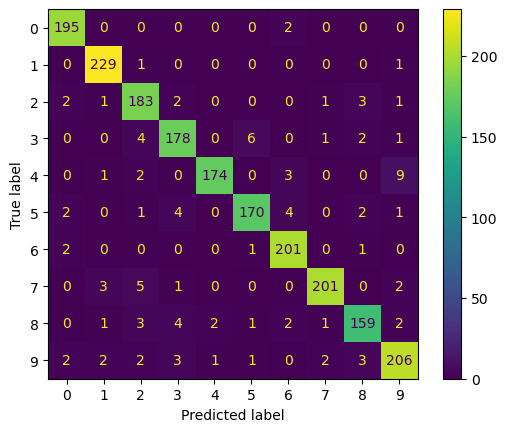

In [23]:
display_confusion_matrix(y_test,y_pred_test_rf)

Support Vector Machine

In [24]:
y_pred_test_svc=loaded_model_svc.predict(X_test_scaled)
test_accuracy_svc = accuracy_score(y_test, y_pred_test_svc)
print("Test Accuracy:", test_accuracy_svc)

Test Accuracy: 0.957


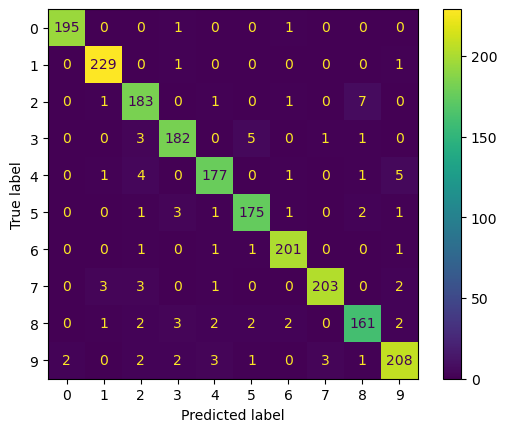

In [25]:
display_confusion_matrix(y_test,y_pred_test_svc)

KNN 

In [27]:
y_pred_test_knn=loaded_model_knn.predict(X_test_scaled)
test_accuracy_knn = accuracy_score(y_test, y_pred_test_knn)
print("Test Accuracy:", test_accuracy_knn)

Test Accuracy: 0.9175


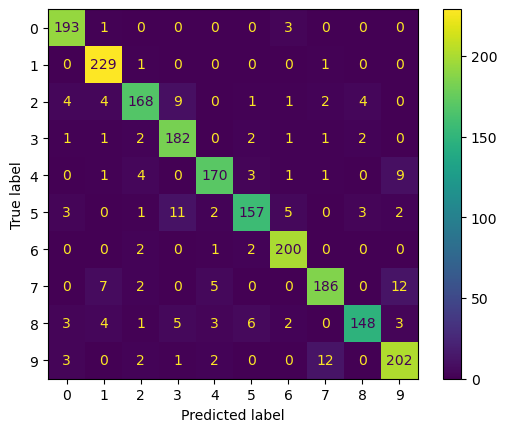

In [28]:
display_confusion_matrix(y_test,y_pred_test_knn)

Here we can see that SVC works best on test data, so we will go further with that.

In [35]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

X = mnist["data"]
y = mnist["target"].astype(np.uint8)

In [36]:
scaler = StandardScaler()
X_scaled_whole = scaler.fit_transform(X)

In [39]:
loaded_model_svc = joblib.load("svc_final.pkl")

In [40]:
loaded_model_svc.fit(X_scaled_whole, y)

SVC(C=0.5, gamma=1, kernel='poly')

In [42]:
joblib.dump(loaded_model_svc, "svc_final_wholedataset.pkl")

['svc_final_wholedataset.pkl']